# 1. Required Libraries Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 2. Dataset Load & Explore

In [ ]:
df = pd.read_csv('Clean_Dataset.csv')

# Remove unnecessary columns
df.drop(['Unnamed: 0', 'flight'], axis=1, inplace=True)

# 3. Data Preprocessing

In [ ]:
# Encode categorical columns
df['class'] = df['class'].apply(lambda x: 1 if x == 'Business' else 0)
df['stops'] = df['stops'].apply(lambda x: 0 if x == 'zero' else 1 if x == 'one' else 2)

# One-hot encoding for categorical features
df = pd.get_dummies(df, columns=['airline', 'source_city', 'departure_time', 'arrival_time', 'destination_city'])

# 4. Feature Scaling

In [ ]:
X = df.drop('price', axis=1)
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Build ANN Model

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))  # regularization
model.add(Dense(64, activation='relu'))
model.add(Dense(1))  # regression output

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# 7. Compile the Model

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 8. Train the Model

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - loss: 328048576.0000 - mae: 10852.5693 - val_loss: 33126546.0000 - val_mae: 3592.7883
Epoch 2/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 34519144.0000 - mae: 3676.9485 - val_loss: 29837560.0000 - val_mae: 3350.2451
Epoch 3/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 31375554.0000 - mae: 3472.3154 - val_loss: 28445206.0000 - val_mae: 3210.0408
Epoch 4/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 30564442.0000 - mae: 3369.0671 - val_loss: 27347328.0000 - val_mae: 3109.3208
Epoch 5/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 30024586.0000 - mae: 3297.7881 - val_loss: 26719000.0000 - val_mae: 3067.8447
Epoch 6/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 29115302.0000 - mae: 3246.3667 - val_loss: 26186682.0000 - val_mae: 3034.9014
Epoch 7/50
6004/6004 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 28485990.0000 - mae: 3211.3777 - val_loss: 25236782.0000 - val_mae: 2965.6384
Epoch 8/50


# 9. Training & Validation Loss Plot

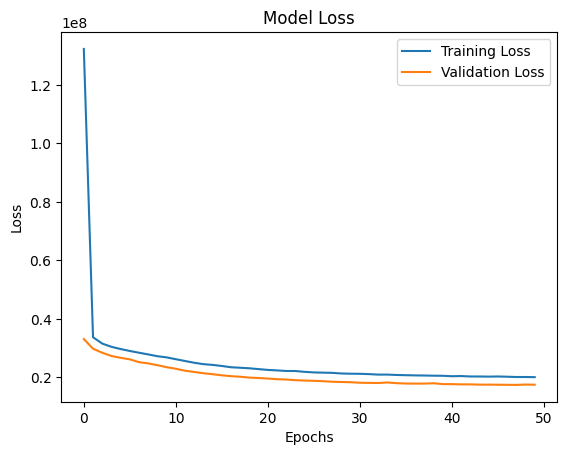

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# 10. Model Evaluation

In [ ]:
y_pred = model.predict(X_test).flatten()

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_pred)))

1876/1876 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
R2 Score: 0.9652807712554932
MAE: 2391.484375
MSE: 17897140.0
RMSE: 4230.501152345902


# 11. Plot: Actual vs Predicted Prices

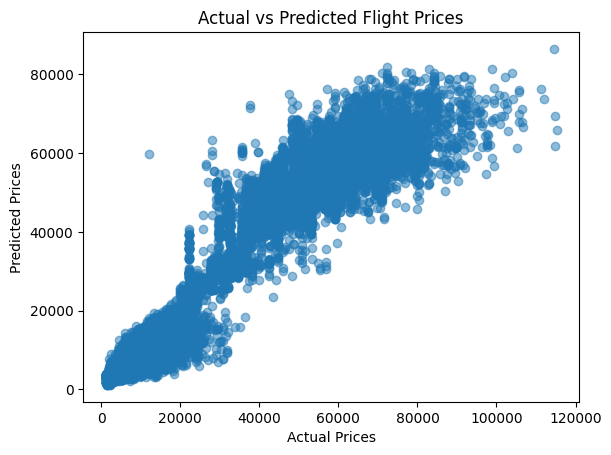

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Flight Prices')
plt.show()